### Table of Contents

1. Preparing Data
2. Classification Model
3. Training
4. Evaluation
5. Improving the model
6. Adding non-linearity
7. Multi-class Classification

## Data Preparation

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples= n_samples, noise= 0.07, random_state= 42)

In [2]:
import pandas as pd
circles = pd.DataFrame({
    "X1":  X[:, 0],
    "X2":  X[:, 1],
    "label": y
})

In [3]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

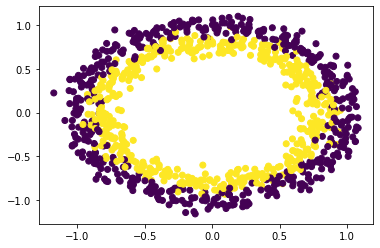

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x = circles["X1"], y = circles["X2"], c= circles["label"]);

In [5]:
# Turning data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42) 
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Model Building

In [7]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
class Model1(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features= 2, out_features= 10)
        self.layer2 = nn.Linear(in_features= 10, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

In [9]:
model_1 = Model1().to(device)
model_1

Model1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [10]:
loss_function = nn.BCEWithLogitsLoss() # built-in sigmoid function
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

In [12]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

## Model Training

In [13]:
torch.manual_seed(42)

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for i in range(100):

    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred_train = torch.round(torch.sigmoid(y_logits))
    loss = loss_function(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)


    if i % 10 == 0:
        print(f"Epoch: {i} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69739, Accuracy: 50.00% | Test loss: 0.70013, Test acc: 50.00%
Epoch: 10 | Loss: 0.69695, Accuracy: 50.25% | Test loss: 0.69972, Test acc: 50.50%
Epoch: 20 | Loss: 0.69657, Accuracy: 51.50% | Test loss: 0.69936, Test acc: 51.50%
Epoch: 30 | Loss: 0.69623, Accuracy: 54.87% | Test loss: 0.69905, Test acc: 53.00%
Epoch: 40 | Loss: 0.69593, Accuracy: 56.50% | Test loss: 0.69877, Test acc: 54.50%
Epoch: 50 | Loss: 0.69567, Accuracy: 57.88% | Test loss: 0.69852, Test acc: 53.50%
Epoch: 60 | Loss: 0.69544, Accuracy: 57.38% | Test loss: 0.69830, Test acc: 52.00%
Epoch: 70 | Loss: 0.69523, Accuracy: 56.12% | Test loss: 0.69811, Test acc: 53.50%
Epoch: 80 | Loss: 0.69505, Accuracy: 55.12% | Test loss: 0.69793, Test acc: 50.50%
Epoch: 90 | Loss: 0.69489, Accuracy: 54.87% | Test loss: 0.69777, Test acc: 50.00%


## Evaluation

In [14]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


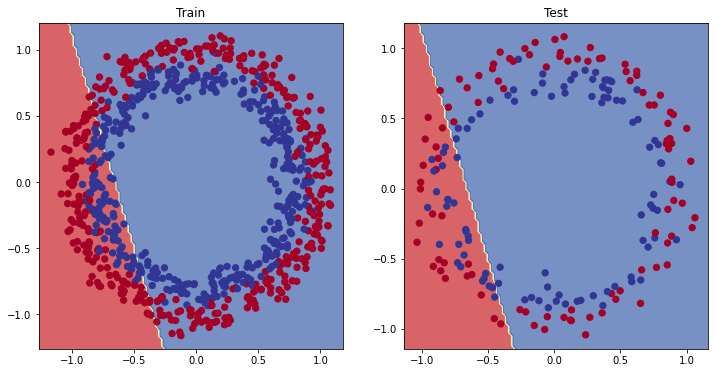

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

The model is clearly undefitting, we need to add non-linearity to the model to make it better

## Adding Non-Linearity

In [35]:
class Model2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features= 10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features= 1)
        self.relu = nn.ReLU()

    
    def forward(self, x):
        return  self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
    

model_2 = Model2().to(device)

In [36]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr= 0.1)

In [40]:
torch.manual_seed(42)
epochs = 2000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):

    model_2.train()
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_function(y_logits, y_train)
    acc_train = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_function(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc_train:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 0.59294, Accuracy: 78.88% | Test Loss: 0.61057, Test Accuracy: 78.0
Epoch: 100 | Loss: 0.52836, Accuracy: 86.00% | Test Loss: 0.56390, Test Accuracy: 81.0
Epoch: 200 | Loss: 0.45037, Accuracy: 89.00% | Test Loss: 0.51339, Test Accuracy: 80.0
Epoch: 300 | Loss: 0.37147, Accuracy: 91.38% | Test Loss: 0.46457, Test Accuracy: 81.5
Epoch: 400 | Loss: 0.30566, Accuracy: 92.75% | Test Loss: 0.42084, Test Accuracy: 83.0
Epoch: 500 | Loss: 0.25886, Accuracy: 93.25% | Test Loss: 0.39403, Test Accuracy: 82.0
Epoch: 600 | Loss: 0.22874, Accuracy: 93.50% | Test Loss: 0.37526, Test Accuracy: 82.0
Epoch: 700 | Loss: 0.20863, Accuracy: 93.75% | Test Loss: 0.36437, Test Accuracy: 83.0
Epoch: 800 | Loss: 0.19530, Accuracy: 93.75% | Test Loss: 0.35704, Test Accuracy: 83.5
Epoch: 900 | Loss: 0.18559, Accuracy: 93.88% | Test Loss: 0.35266, Test Accuracy: 83.5
Epoch: 1000 | Loss: 0.17916, Accuracy: 93.88% | Test Loss: 0.35195, Test Accuracy: 83.5
Epoch: 1100 | Loss: 0.17456, Accuracy: 94.00

In [41]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 0., 1., 0., 0., 0., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

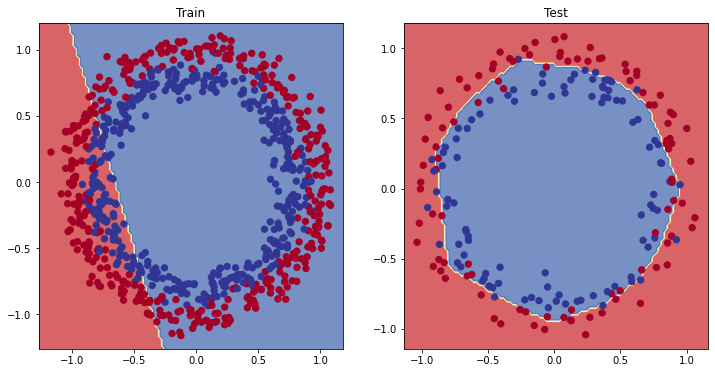

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # with non linearity